## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Observing the data

In [3]:
df = pd.read_csv('terror.csv', encoding='latin1')
df.head()

,eventid,iyear,imonth,iday,extended,country_txt,region_txt,city,latitude,longitude,...,nperps,claimed,weaptype1_txt,nkill,nkillter,nwound,propextent_txt,ishostkid,ransom,nreleased
0,197000000002,1970,0,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,...,7.0,NaN,Unknown,0.0,NaN,0.0,NaN,1.0,1.0,NaN
1,197001000001,1970,1,0,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,...,NaN,NaN,Unknown,1.0,NaN,0.0,NaN,0.0,0.0,NaN
2,197001000002,1970,1,0,0,Greece,Western Europe,Athens,37.997490,23.762728,...,NaN,NaN,Explosives,NaN,NaN,NaN,NaN,0.0,0.0,NaN
3,197001000003,1970,1,0,0,Japan,East Asia,Fukouka,33.580412,130.396361,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,0.0,0.0,NaN
4,197001010002,1970,1,1,0,United States,North America,Cairo,37.005105,-89.176269,...,-99.0,0.0,Firearms,0.0,0.0,0.0,Minor (likely < $1 million),0.0,0.0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201183 entries, 0 to 201182
Data columns (total 29 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   eventid          201183 non-null  int64  
 1   iyear            201183 non-null  int64  
 2   imonth           201183 non-null  int64  
 3   iday             201183 non-null  int64  
 4   extended         201183 non-null  int64  
 5   country_txt      201183 non-null  object 
 6   region_txt       201183 non-null  object 
 7   city             200756 non-null  object 
 8   latitude         196556 non-null  float64
 9   longitude        196555 non-null  float64
 10  vicinity         201183 non-null  int64  
 11  crit1            201183 non-null  int64  
 12  multiple         201183 non-null  int64  
 13  success          201183 non-null  int64  
 14  suicide          201183 non-null  int64  
 15  attacktype1_txt  201183 non-null  object 
 16  targtype1_txt    201183 non-null  obje

## Cleaning and getting usefeul data for visualizing

In [5]:
df.drop('eventid', axis=1, inplace=True)

In [6]:
df.head()

,iyear,imonth,iday,extended,country_txt,region_txt,city,latitude,longitude,vicinity,...,nperps,claimed,weaptype1_txt,nkill,nkillter,nwound,propextent_txt,ishostkid,ransom,nreleased
0,1970,0,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,0,...,7.0,NaN,Unknown,0.0,NaN,0.0,NaN,1.0,1.0,NaN
1,1970,1,0,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,0,...,NaN,NaN,Unknown,1.0,NaN,0.0,NaN,0.0,0.0,NaN
2,1970,1,0,0,Greece,Western Europe,Athens,37.997490,23.762728,0,...,NaN,NaN,Explosives,NaN,NaN,NaN,NaN,0.0,0.0,NaN
3,1970,1,0,0,Japan,East Asia,Fukouka,33.580412,130.396361,0,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,0.0,0.0,NaN
4,1970,1,1,0,United States,North America,Cairo,37.005105,-89.176269,0,...,-99.0,0.0,Firearms,0.0,0.0,0.0,Minor (likely < $1 million),0.0,0.0,NaN


In [7]:
df.rename(columns={'iyear': 'year', 'imonth': 'month', 'country_txt': 'country', 'region_txt': 'region',
                   'attacktype1_txt':'attack', 'targtype1_txt': 'target', 'natlty1_txt': 'nationality'}, inplace=True)
df.head()

,year,month,iday,extended,country,region,city,latitude,longitude,vicinity,...,nperps,claimed,weaptype1_txt,nkill,nkillter,nwound,propextent_txt,ishostkid,ransom,nreleased
0,1970,0,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,0,...,7.0,NaN,Unknown,0.0,NaN,0.0,NaN,1.0,1.0,NaN
1,1970,1,0,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,0,...,NaN,NaN,Unknown,1.0,NaN,0.0,NaN,0.0,0.0,NaN
2,1970,1,0,0,Greece,Western Europe,Athens,37.997490,23.762728,0,...,NaN,NaN,Explosives,NaN,NaN,NaN,NaN,0.0,0.0,NaN
3,1970,1,0,0,Japan,East Asia,Fukouka,33.580412,130.396361,0,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,0.0,0.0,NaN
4,1970,1,1,0,United States,North America,Cairo,37.005105,-89.176269,0,...,-99.0,0.0,Firearms,0.0,0.0,0.0,Minor (likely < $1 million),0.0,0.0,NaN


In [8]:
df1 = df[['year', 'country', 'region', 'city', 'latitude', 'longitude', 'attack', 'target', 'nationality']]
df1.head()

,year,country,region,city,latitude,longitude,attack,target,nationality
0,1970,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),Belgium
1,1970,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,Journalists & Media,United States
2,1970,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,Government (Diplomatic),United States
3,1970,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),United States
4,1970,United States,North America,Cairo,37.005105,-89.176269,Armed Assault,Police,United States


## Visuzalization

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


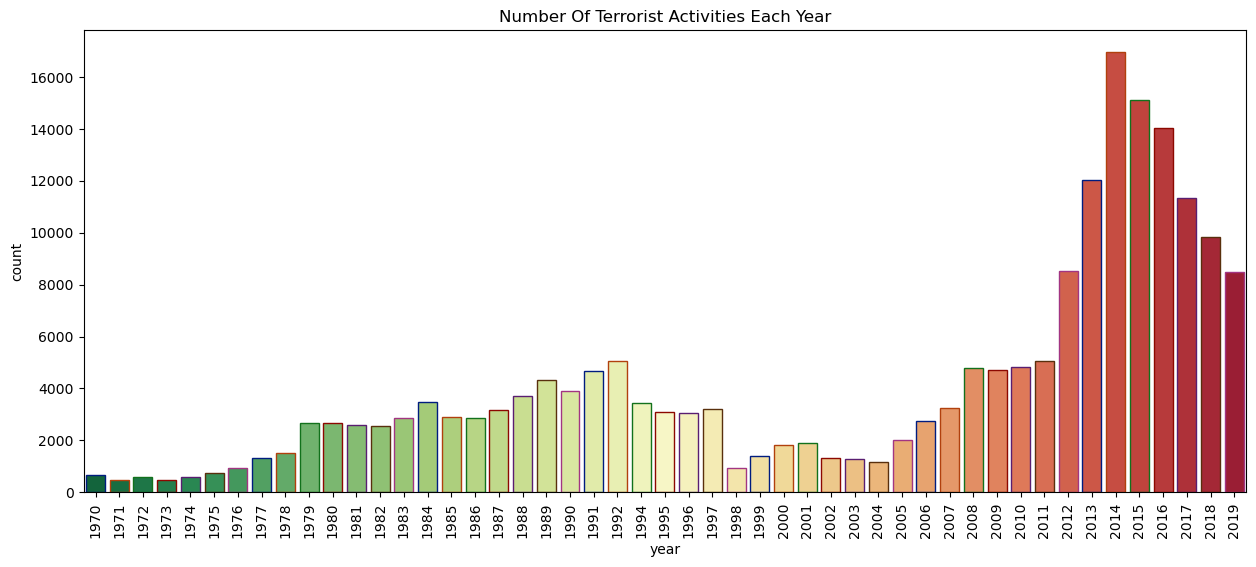

In [9]:
plt.subplots(figsize=(15,6))
sns.countplot('year',data=df1,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


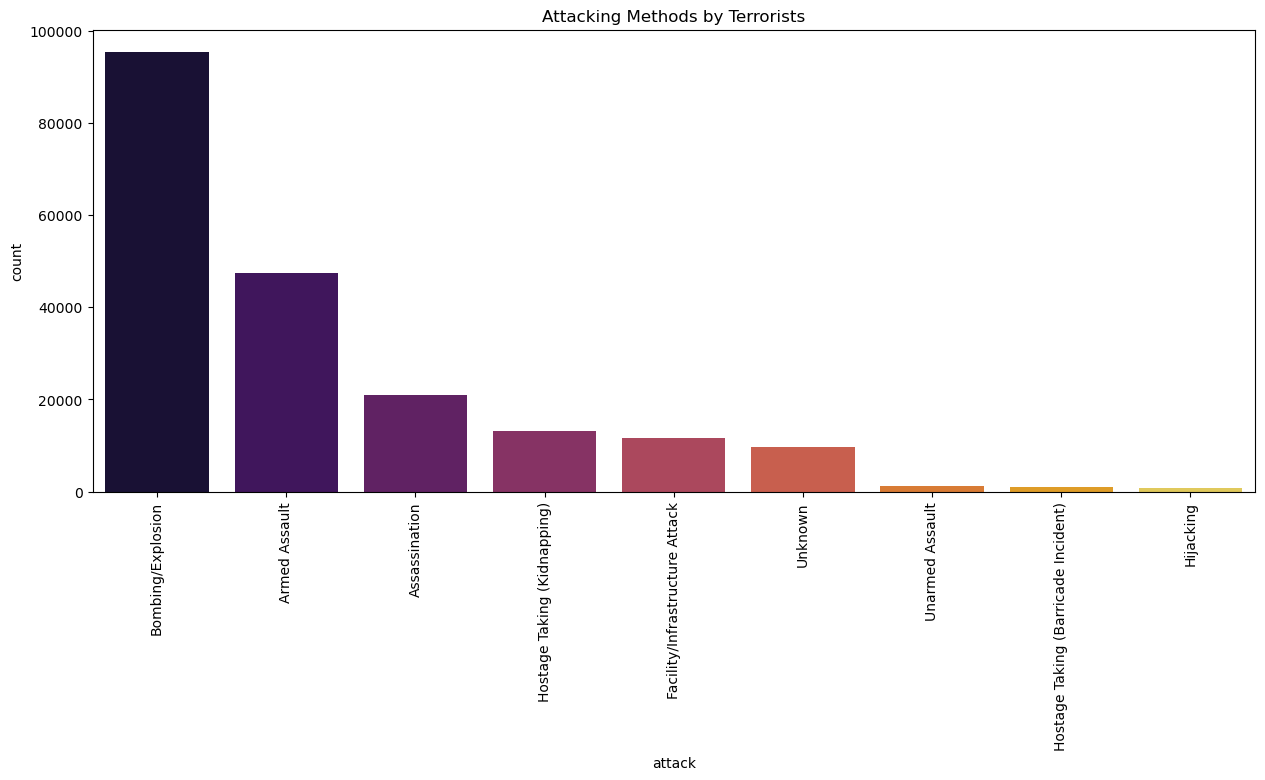

In [10]:
plt.subplots(figsize=(15,6))
sns.countplot('attack',data=df1,palette='inferno',order=df1['attack'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods by Terrorists')
plt.show()

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


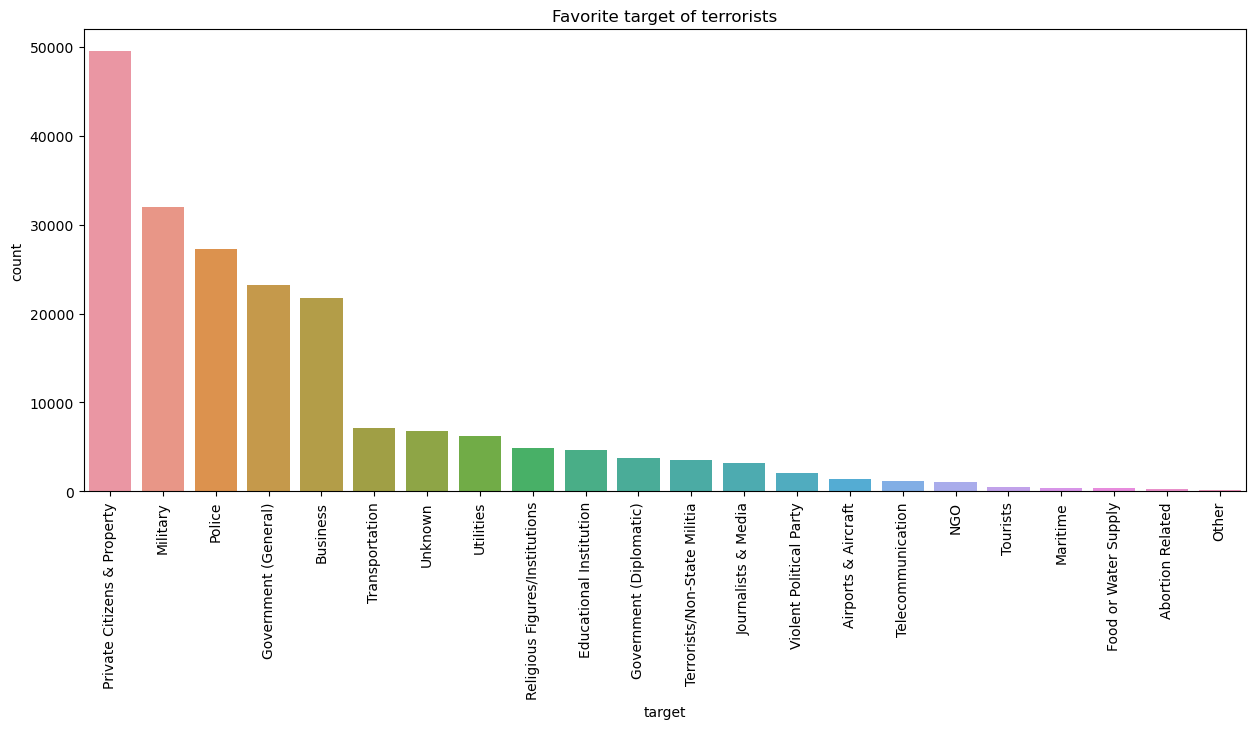

In [11]:
plt.subplots(figsize=(15, 6))
sns.countplot('target', data=df1, order = df1['target'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Favorite target of terrorists')
plt.show()

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


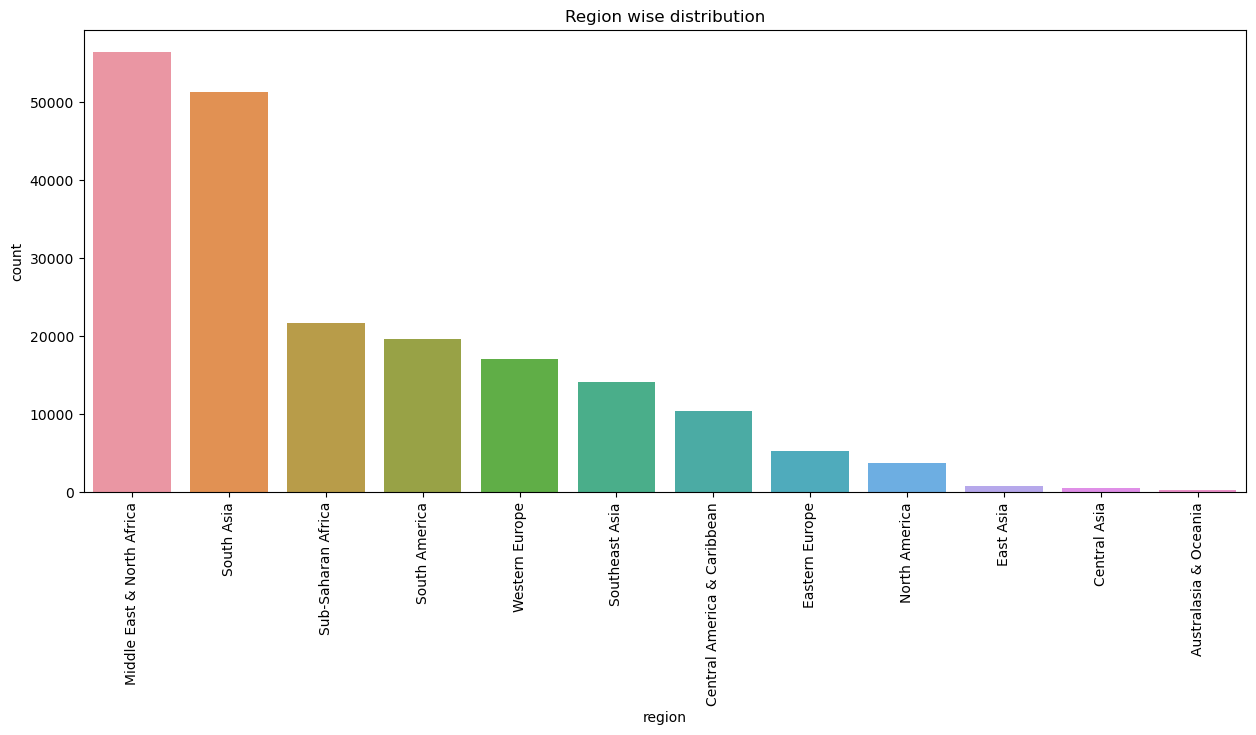

In [12]:
plt.subplots(figsize=(15, 6))
sns.countplot('region', data=df1, order = df1['region'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Region wise distribution')
plt.show()

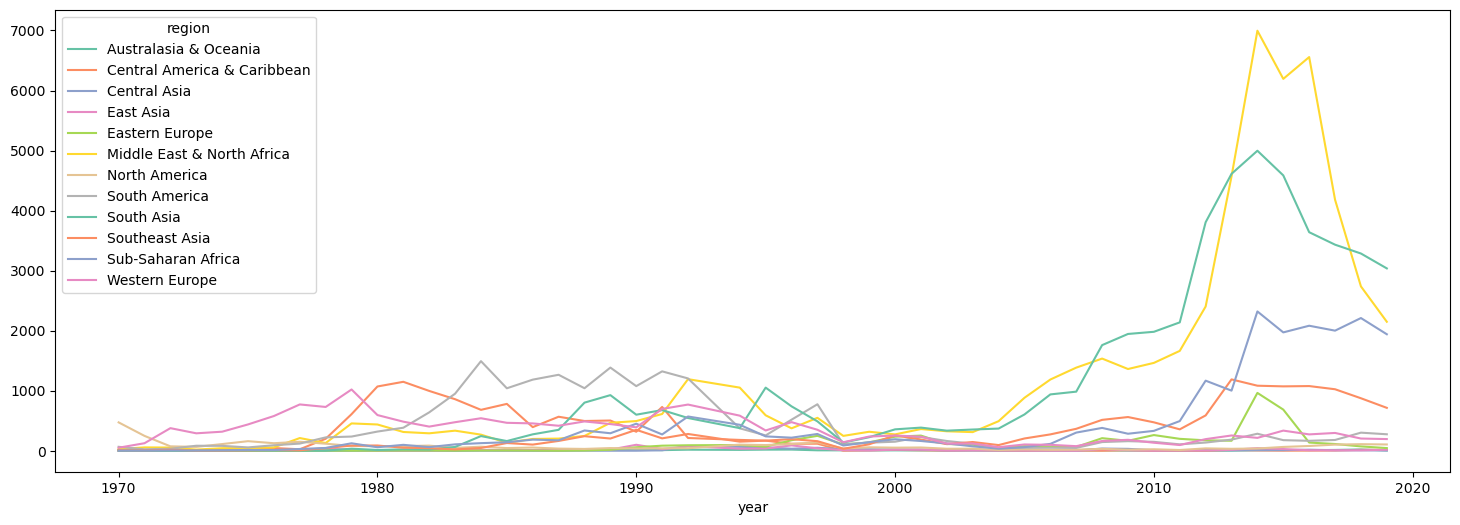

In [13]:
terror_region=pd.crosstab(df1.year,df1.region)
terror_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

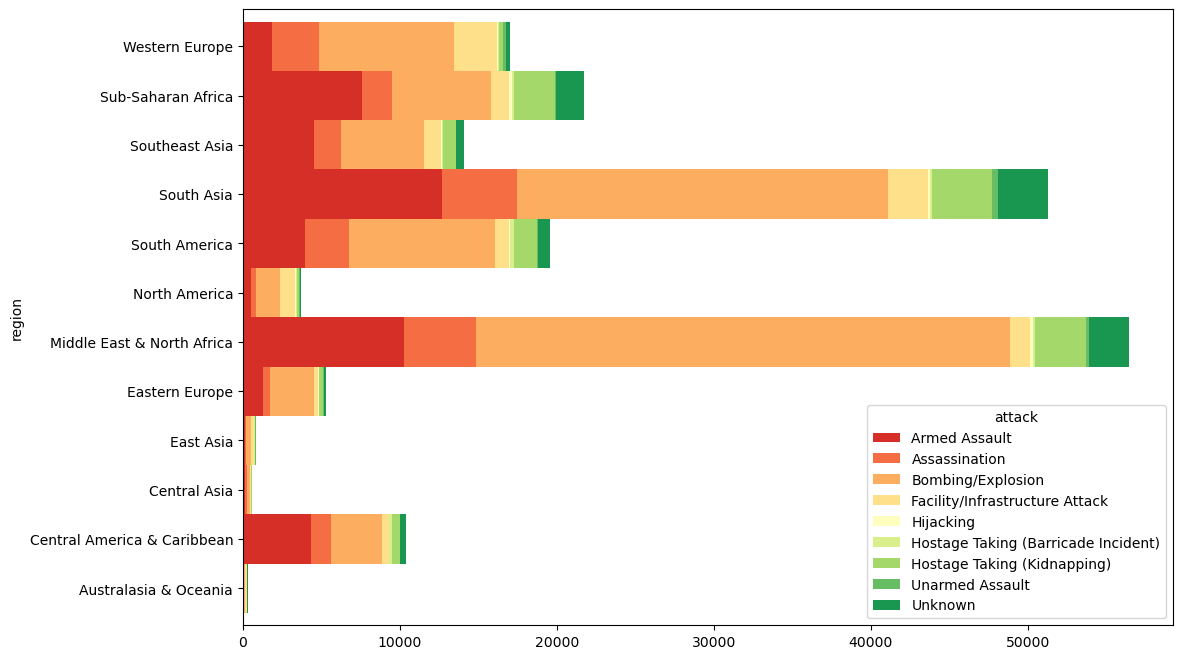

In [14]:
pd.crosstab(df1.region,df1.attack).plot.barh(stacked=True,width=1,color=sns.color_palette('RdYlGn',9))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


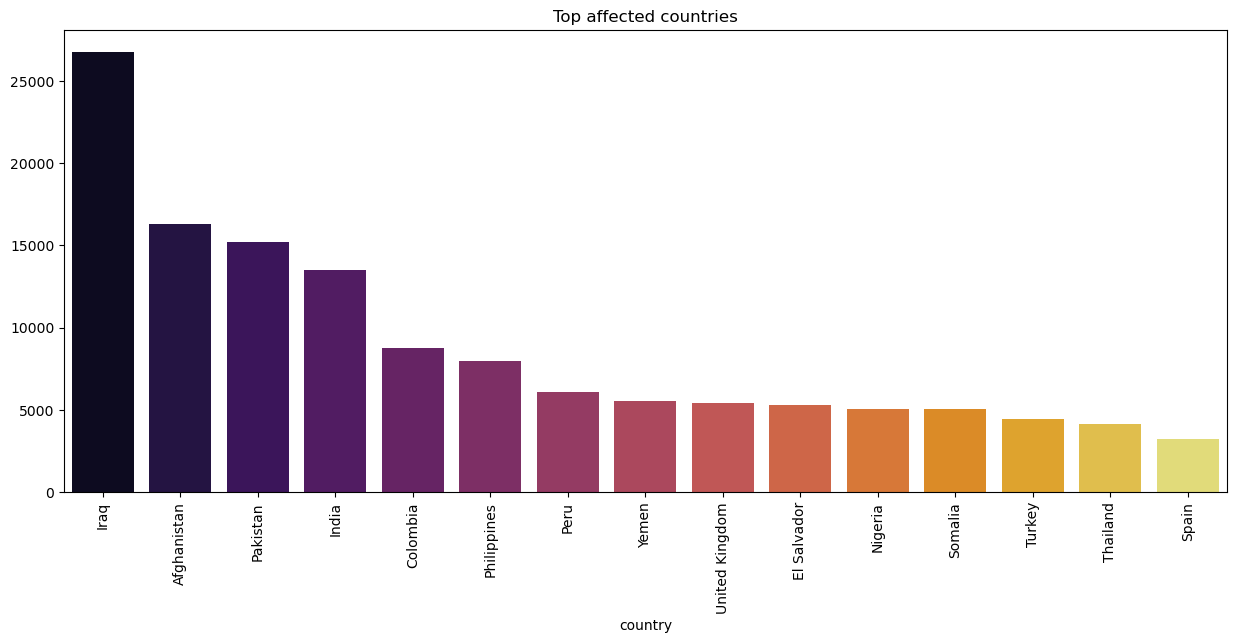

In [15]:
plt.subplots(figsize=(15, 6))
sns.barplot(df1['country'].value_counts()[:15].index,df1['country'].value_counts()[:15].values,palette='inferno')
plt.xticks(rotation=90)
plt.title('Top affected countries')
plt.show()

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


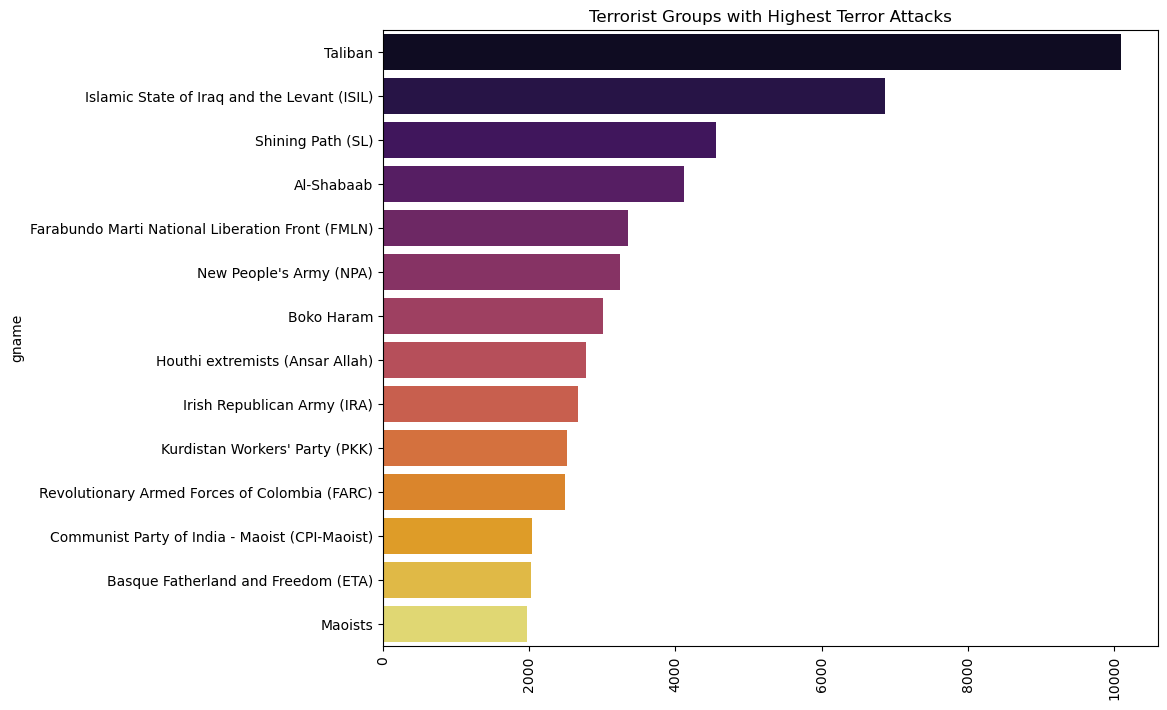

In [16]:
sns.barplot(df['gname'].value_counts()[1:15].values,df['gname'].value_counts()[1:15].index,palette=('inferno'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.show()

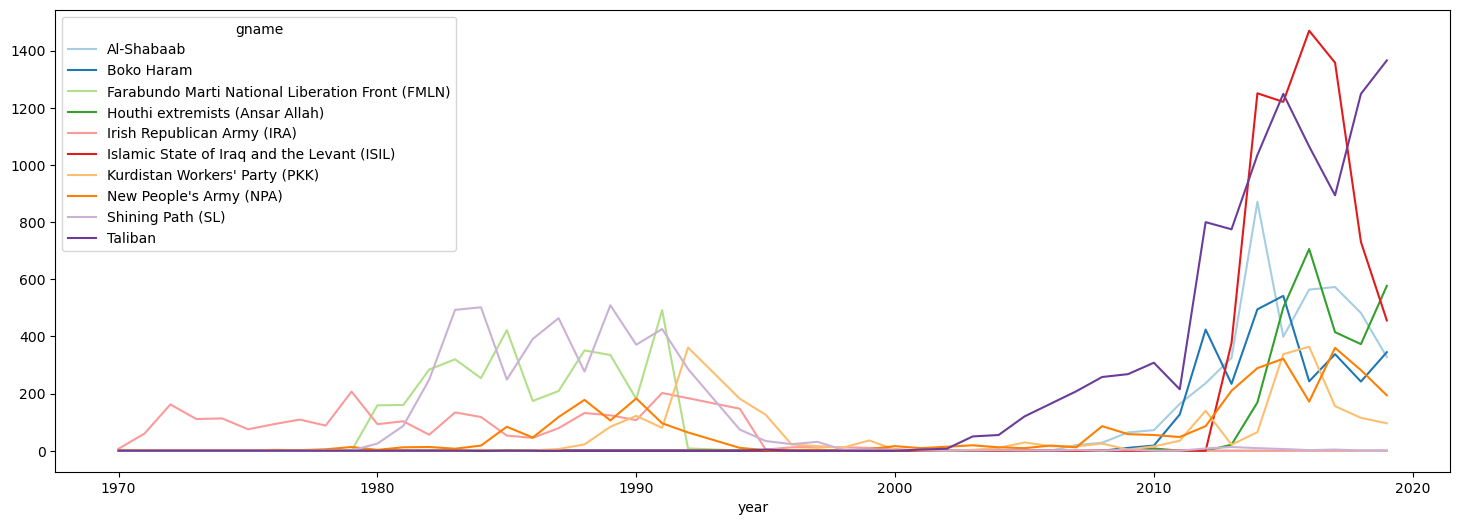

In [17]:
top10trg = df[df['gname'].isin(df['gname'].value_counts()[1:11].index)]
pd.crosstab(top10trg.year,top10trg.gname).plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

In [18]:
df_m = pd.read_csv('motive.csv')

In [21]:
df_m.head()

,motive
0,To protest the Cairo Illinois Police Deparment
1,To protest the War in Vietnam and the draft
2,To protest the War in Vietnam and the draft
3,Protest the draft and Vietnam War
4,To protest United States owned businesses in P...


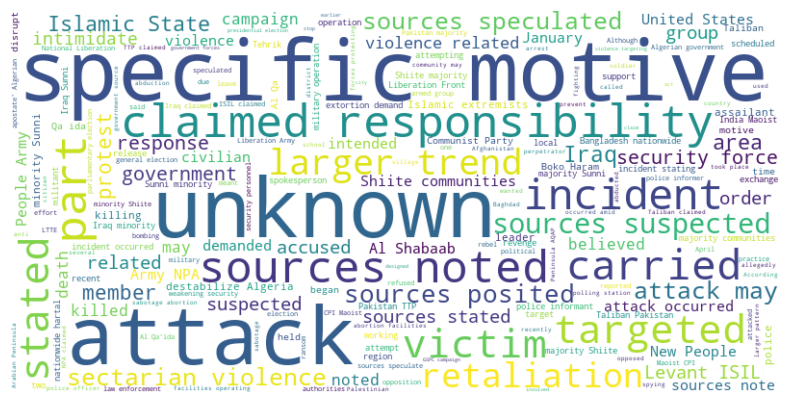

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Remove 'unknown' from the motives
filtered_text = ' '.join([mot for mot in df_m['motive'] if mot.lower() != 'unknown'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

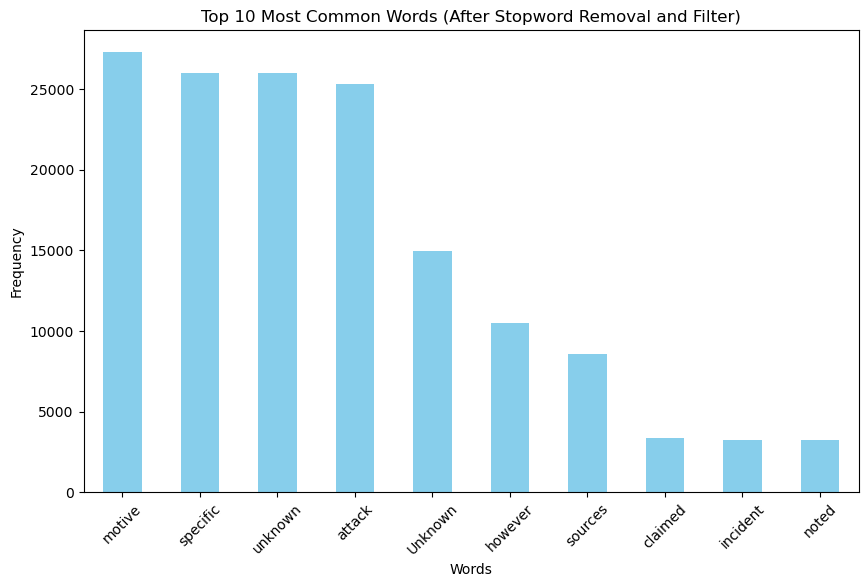

In [30]:
text = ' '.join(df_m['motive'])

# Tokenize the text
tokens = word_tokenize(text)

# Remove stopwords
stop_words = set(stopwords.words('english'))
# Remove stopwords and non-alphabetic words
filtered_tokens = [word for word in tokens if word.lower() not in stop_words and word.isalpha()]

# Create a pandas Series from the filtered tokens excluding the most frequent word
word_counts = pd.Series(filtered_tokens).value_counts()[0:10]

# Plot the bar chart
plt.figure(figsize=(10, 6))
word_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Common Words (After Stopword Removal and Filter)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()